<a href="https://colab.research.google.com/github/ruzan-ai/churn_project_end_to_end/blob/main/Survival_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# churn_survival_analysis.py

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from lifelines import KaplanMeierFitter

# ------------------------------
# 1. Generate Dummy Customer Data (100k customers)
# ------------------------------
np.random.seed(42)

n_customers = 100000
customer_ids = np.arange(1, n_customers + 1)

# Assume today is 2023-04-01
today = pd.to_datetime('2023-04-01')

# Randomly generate last activity dates within the last 120 days
last_activity_days_ago = np.random.randint(0, 120, size=n_customers)
last_activity_dates = today - pd.to_timedelta(last_activity_days_ago, unit='d')

# Create DataFrame
customer_df = pd.DataFrame({
    'customer_id': customer_ids,
    'last_activity_date': last_activity_dates,
    'today_date': today
})

# Calculate inactivity days
customer_df['days_inactive'] = (customer_df['today_date'] - customer_df['last_activity_date']).dt.days

print("\nSample of customer inactivity data:")
print(customer_df.head())

# ------------------------------
# 2. Plot Survival Curve
# ------------------------------
kmf = KaplanMeierFitter()

# Create the duration and event columns
# For churn simulation: let's say if days_inactive > 60, customer churned
customer_df['churned'] = (customer_df['days_inactive'] > 60).astype(int)

# Fit the model
kmf.fit(durations=customer_df['days_inactive'], event_observed=customer_df['churned'])

# Plot
plt.figure(figsize=(10,6))
kmf.plot()
plt.title('Customer Survival Curve (Simulated Data, 100k customers)')
plt.xlabel('Days Since Last Activity')
plt.ylabel('Probability Customer is Still Active')
plt.grid(True)
plt.show()

# ------------------------------
# 3. Optional: Print Some Survival Probabilities
# ------------------------------
print("\nSurvival probabilities at specific day marks:")
for day in [30, 45, 60, 75, 90]:
    surv_prob = kmf.predict(day)
    print(f"Day {day}: {surv_prob:.2f} probability still active")

# ------------------------------
# 4. Interpretation Help
# ------------------------------
print("""
Interpretation:
- Where the survival curve drops steeply = natural churn zone.
- For example, if curve drops sharply after 50-60 days, 60 days is a good churn cutoff.
""")

In [ ]:
pip install lifelines

  Preparing metadata (setup.py) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 349.3/349.3 kB 22.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 115.7/115.7 kB 10.6 MB/s eta 0:00:00
  Created wheel for autograd-gamma: filename=autograd_gamma-0.5.0-py3-none-any.whl size=4030 sha256=06f17973ac2ac457c758dea1183cf6023a89ae9b32092708ac2207a78891ba7a
  Stored in directory: /root/.cache/pip/wheels/8b/67/f4/2caaae2146198dcb824f31a303833b07b14a5ec863fb3acd7b
Successfully built autograd-gamma


In [ ]:
# churn_survival_analysis.py

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from lifelines import KaplanMeierFitter

In [ ]:
# ------------------------------
# 1. Generate Dummy Customer Data (100k customers)
# ------------------------------
np.random.seed(42)

n_customers = 100000
customer_ids = np.arange(1, n_customers + 1)

# Assume today is 2023-04-01
today = pd.to_datetime('2023-04-01')

# Randomly generate last activity dates within the last 120 days
last_activity_days_ago = np.random.randint(0, 120, size=n_customers)
last_activity_dates = today - pd.to_timedelta(last_activity_days_ago, unit='d')

# Create DataFrame
customer_df = pd.DataFrame({
    'customer_id': customer_ids,
    'last_activity_date': last_activity_dates,
    'today_date': today
})

# Calculate inactivity days
customer_df['days_inactive'] = (customer_df['today_date'] - customer_df['last_activity_date']).dt.days

print("\nSample of customer inactivity data:")
print(customer_df.head())



Sample of customer inactivity data:
   customer_id last_activity_date today_date  days_inactive
0            1         2022-12-20 2023-04-01            102
1            2         2023-02-09 2023-04-01             51
2            3         2022-12-30 2023-04-01             92
3            4         2023-03-18 2023-04-01             14
4            5         2022-12-16 2023-04-01            106


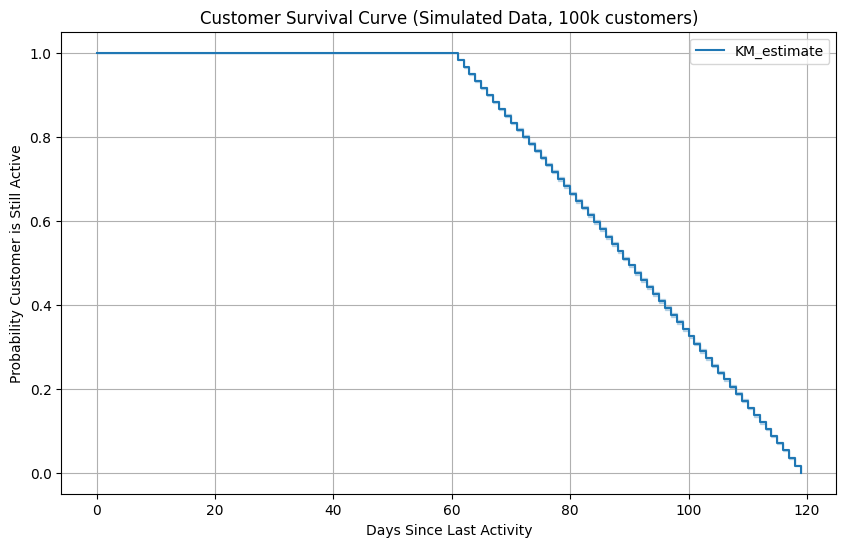

In [ ]:
# ------------------------------
# 2. Plot Survival Curve
# ------------------------------
kmf = KaplanMeierFitter()

# Create the duration and event columns
# For churn simulation: let's say if days_inactive > 60, customer churned
customer_df['churned'] = (customer_df['days_inactive'] > 60).astype(int)

# Fit the model
kmf.fit(durations=customer_df['days_inactive'], event_observed=customer_df['churned'])

# Plot
plt.figure(figsize=(10,6))
kmf.plot()
plt.title('Customer Survival Curve (Simulated Data, 100k customers)')
plt.xlabel('Days Since Last Activity')
plt.ylabel('Probability Customer is Still Active')
plt.grid(True)
plt.show()

In [ ]:
customer_df.head()

,customer_id,last_activity_date,today_date,days_inactive,churned
0,1,2022-12-20,2023-04-01,102,1
1,2,2023-02-09,2023-04-01,51,0
2,3,2022-12-30,2023-04-01,92,1
3,4,2023-03-18,2023-04-01,14,0
4,5,2022-12-16,2023-04-01,106,1


In [ ]:
# ------------------------------
# 3. Optional: Print Some Survival Probabilities
# ------------------------------
print("\nSurvival probabilities at specific day marks:")
for day in [30, 45, 60, 75, 90]:
    surv_prob = kmf.predict(day)
    print(f"Day {day}: {surv_prob:.2f} probability still active")


Survival probabilities at specific day marks:
Day 30: 1.00 probability still active
Day 45: 1.00 probability still active
Day 60: 1.00 probability still active
Day 75: 0.75 probability still active
Day 90: 0.49 probability still active


In [ ]:
# ------------------------------
# 4. Interpretation Help
# ------------------------------
print("""
Interpretation:
- Where the survival curve drops steeply = natural churn zone.
- For example, if curve drops sharply after 50-60 days, 60 days is a good churn cutoff.
""")


Interpretation:
- Where the survival curve drops steeply = natural churn zone.
- For example, if curve drops sharply after 50-60 days, 60 days is a good churn cutoff.



In [ ]:
# Example: Try 30-day churn cutoff
customer_df['churned_30'] = (customer_df['days_inactive'] > 30).astype(int)

# Try 45-day cutoff
customer_df['churned_45'] = (customer_df['days_inactive'] > 45).astype(int)

# Try 60, 75, 90-day cutoffs


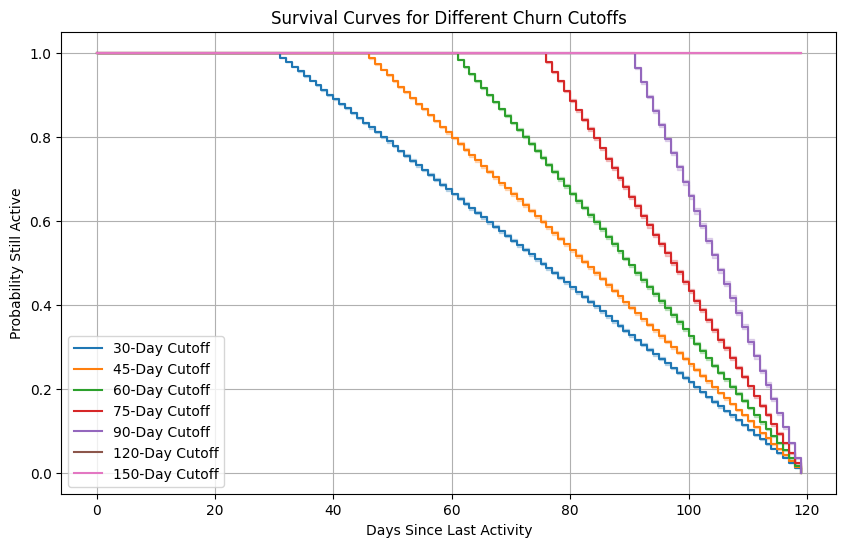

In [ ]:
from lifelines import KaplanMeierFitter
import matplotlib.pyplot as plt

kmf = KaplanMeierFitter()

plt.figure(figsize=(10,6))

for cutoff in [30, 45, 60, 75, 90,120, 150]:
    churn_col = f'churned_{cutoff}'
    customer_df[churn_col] = (customer_df['days_inactive'] > cutoff).astype(int)
    kmf.fit(customer_df['days_inactive'], event_observed=customer_df[churn_col], label=f'{cutoff}-Day Cutoff')
    kmf.plot_survival_function()

plt.title("Survival Curves for Different Churn Cutoffs")
plt.xlabel("Days Since Last Activity")
plt.ylabel("Probability Still Active")
plt.grid(True)
plt.legend()
plt.show()
